# City of Pittsburgh Playgrounds Analysis  
---

## Introduction  
This notebook contains my analysis of the City of Pittsburgh Playgrounds dataset. My goal is to contribute to the group project determining the "best" neighborhood in Pittsburgh by using a data-driven Playground Density metric.

The playground dataset is sourced from the Western Pennsylvania Regional Data Center (WPRDC) and includes detailed information about playground locations and attributes across Pittsburgh's neighborhoods.

In this notebook, I will:  
- Load and explore the playground dataset  
- Define and calculate a Playground Density metric  
- Visualize playground distribution across neighborhoods  
- Provide interpretation and insights  


## Dataset Description  
- **Source:** [City of Pittsburgh Playgrounds - WPRDC](https://data.wprdc.org/dataset/playgrounds)  
- **Data URL:** https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367  

The dataset contains information on playground names, locations, neighborhood, maintenance responsibility, and other features.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
playgrounds_url = 'https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367'
playgrounds_df = pd.read_csv(playgrounds_url)

# Preview data
print("Dataset preview:")
print(playgrounds_df.head())

print("\nColumn names:")
print(playgrounds_df.columns.tolist())


Dataset preview:
   _id          id                      name  type maintenance_responsibility  \
0    1   731501774      Able Long Playground   NaN            Parks - Western   
1    2  1461276747  Albert Graham Playground   NaN           Parks - Schenley   
2    3  1860709784         Alpine Playground   NaN           Parks - Northern   
3    4  1770671485          Alton Playground   NaN            Parks - Western   
4    5    18942817          Ammon Playground   NaN           Parks - Schenley   

                      park       street  \
0           Able Long Park    COAST AVE   
1  Albert Turk Graham Park  FORESIDE PL   
2      Alpine Gardens Park   ALPINE AVE   
3               Alton Park   ANDICK WAY   
4               Ammon Park    MEMORY LN   

                                               image       neighborhood  \
0  https://tools.wprdc.org/images/pittsburgh/play...          Beechview   
1  https://tools.wprdc.org/images/pittsburgh/play...   Crawford-Roberts   
2  https://t

## Metric Definition - Playground Density  
I define Playground Density as the number of playgrounds in each neighborhood, a metric indicating playground availability and potential quality of life for residents with children.

I calculate this by grouping the dataset by neighborhood and counting the playgrounds per neighborhood.


In [19]:
# Calculate Playground Density
playground_density = playgrounds_df.groupby('neighborhood').size().reset_index(name='playground_count')
playground_density = playground_density.sort_values(by='playground_count', ascending=False)

print("Playground Density by Neighborhood (Top 10):")
print(playground_density.head(10))


Playground Density by Neighborhood (Top 10):
           neighborhood  playground_count
56  Squirrel Hill South                 8
4             Beechview                 5
52    South Side Slopes                 5
0      Allegheny Center                 4
29        Highland Park                 4
49             Sheraden                 4
5           Beltzhoover                 4
63  Upper Lawrenceville                 3
40     Mount Washington                 3
28            Hazelwood                 3


## Visualization of Playground Density  
The bar chart below shows the top 10 neighborhoods by Playground Density.


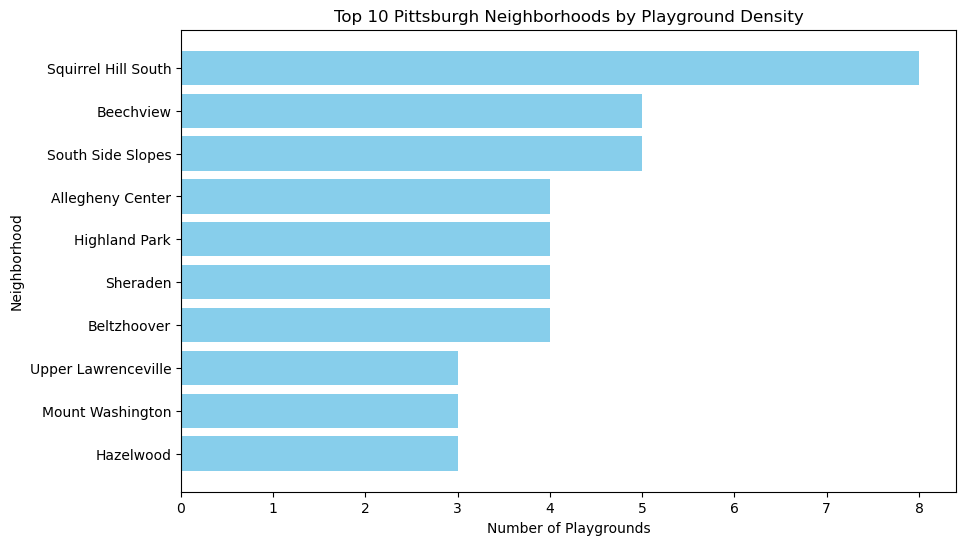

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(playground_density['neighborhood'].head(10), playground_density['playground_count'].head(10), color='skyblue')
plt.xlabel('Number of Playgrounds')
plt.ylabel('Neighborhood')
plt.title('Top 10 Pittsburgh Neighborhoods by Playground Density')
plt.gca().invert_yaxis()
plt.show()


## Conclusion and Reflection

Based on the Playground Density metric, Squirrel Hill South has the highest number of playgrounds among Pittsburgh neighborhoods ranked in the top 10.

Beechview and South Side Slopes both tie for second place, each with 5 playgrounds. This tie indicates multiple neighborhoods offer abundant playground access, highlighting several potentially family-friendly areas.

This playground analysis adds an important dimension to our group’s overall assessment of the best neighborhood in Pittsburgh.
